In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
data = pd.read_csv('/content/sample_data/cricket_data.csv')

In [24]:
data

,player,match,wicket,runs
0,1,12,44,50
1,2,11,2,600
2,3,13,40,115
3,4,12,25,301
4,5,22,0,1005
5,6,21,1,1192
6,7,20,38,370
7,8,22,79,0
8,9,22,75,112
9,10,20,45,450


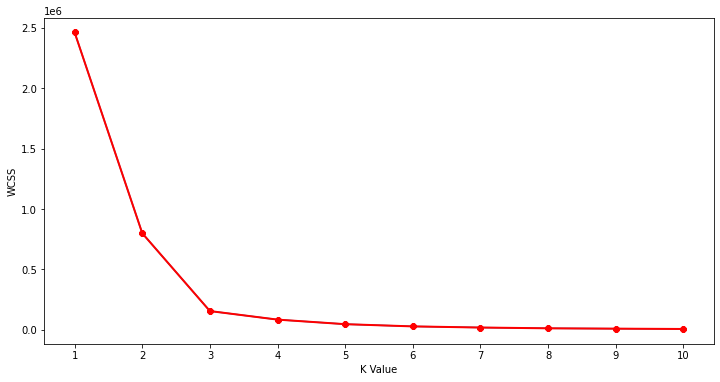

In [25]:
X = data[['match','wicket','runs']].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X)

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [29]:
model=KMeans(n_clusters=3)
model.fit(X1)
data["label"] = model.predict(X1)
data2 = data.sort_values(by=['label'], ascending=False)
data2

,player,match,wicket,runs,label
10,11,20,69,65,2
7,8,22,79,0,2
18,19,21,39,600,2
17,18,20,41,450,2
9,10,20,45,450,2
8,9,22,75,112,2
6,7,20,38,370,2
19,20,20,2,1150,1
5,6,21,1,1192,1
4,5,22,0,1005,1
